In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns', None)
train = pd.read_csv("../house_price.csv")

In [3]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
print("Number of Numerical Featues is {}".format(len(numerical_features)))

Number of Numerical Featues is 38


In [4]:
year_features = [feature for feature in train.columns if 'Yr' in feature or 'Year' in feature ]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [5]:
numerical_features
discrete_numerical_features = [feature for feature in numerical_features if train[feature].nunique()<25 and feature not in year_features + ['Id']]

print("Number of Numerical Features are {}".format(len(discrete_numerical_features)))

Number of Numerical Features are 17


In [6]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_numerical_features + year_features + ['Id'] ]
print("Number of continuous features are {}".format(len(continuous_features)))

Number of continuous features are 16


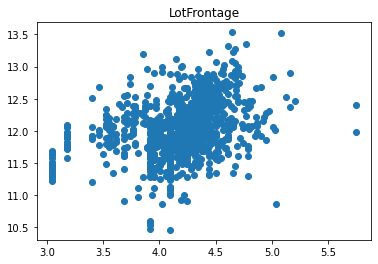

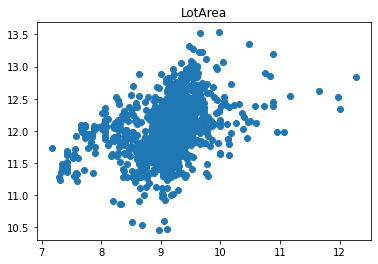

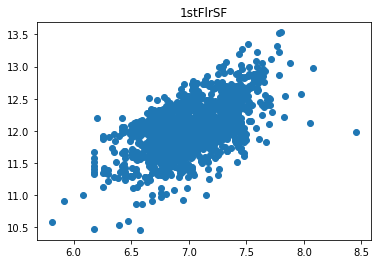

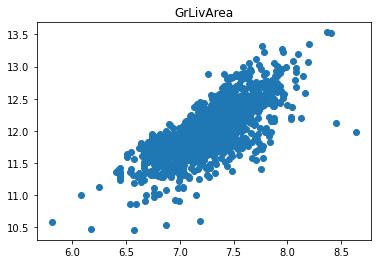

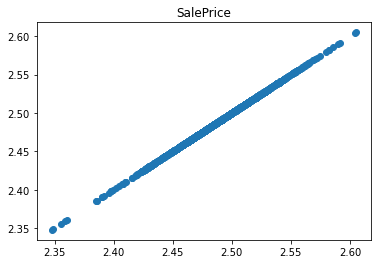

In [10]:
# Some results are skewed. we use logarithmic transformation
data = train.copy()
data['SalePrice'] = np.log(data['SalePrice'])
for feature in continuous_features:
    if 0 in data[feature].unique():
        continue
    data[feature] = np.log(data[feature])
    plt.scatter(data[feature], data['SalePrice'])
    plt.title(feature)
    plt.show()

### Outliers

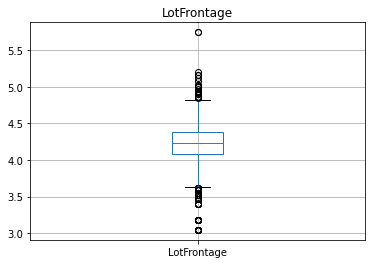

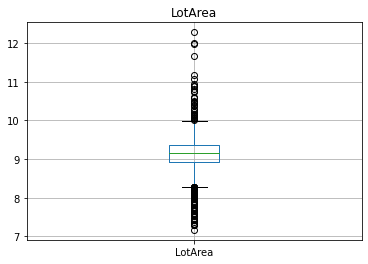

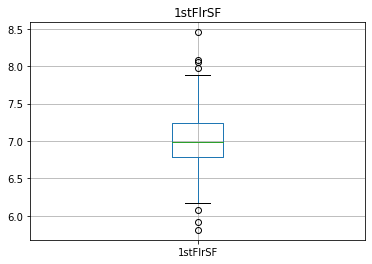

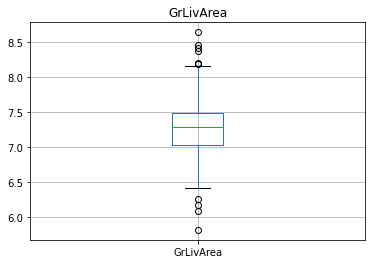

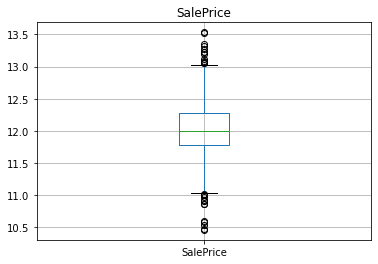

In [16]:
data = train.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        continue
    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

## Categorical Variables

In [19]:
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']

In [18]:
train["Id"].dtype

dtype('int64')

In [21]:
print("Number of categorical feature is {}".format(len(categorical_features)))

Number of categorical feature is 43


In [23]:
#for each categorical feature, find the cardinality
for feature in categorical_features:
    print("{} has unique values : {} ".format(feature, train[feature].nunique()))

MSZoning has unique values : 5 
Street has unique values : 2 
Alley has unique values : 2 
LotShape has unique values : 4 
LandContour has unique values : 4 
Utilities has unique values : 2 
LotConfig has unique values : 5 
LandSlope has unique values : 3 
Neighborhood has unique values : 25 
Condition1 has unique values : 9 
Condition2 has unique values : 8 
BldgType has unique values : 5 
HouseStyle has unique values : 8 
RoofStyle has unique values : 6 
RoofMatl has unique values : 8 
Exterior1st has unique values : 15 
Exterior2nd has unique values : 16 
MasVnrType has unique values : 4 
ExterQual has unique values : 4 
ExterCond has unique values : 5 
Foundation has unique values : 6 
BsmtQual has unique values : 4 
BsmtCond has unique values : 4 
BsmtExposure has unique values : 4 
BsmtFinType1 has unique values : 6 
BsmtFinType2 has unique values : 6 
Heating has unique values : 6 
HeatingQC has unique values : 5 
CentralAir has unique values : 2 
Electrical has unique values : 

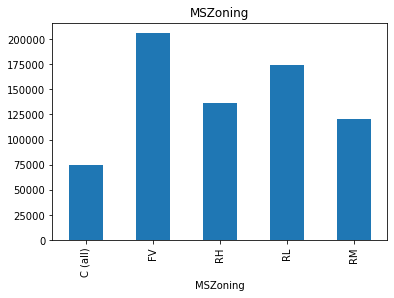

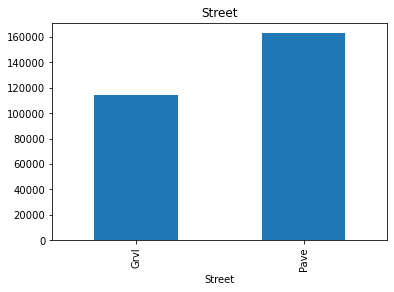

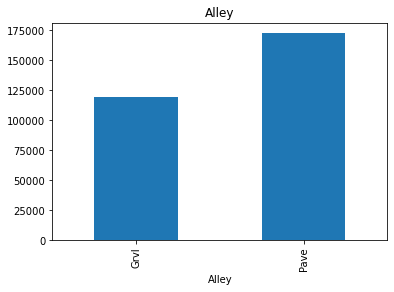

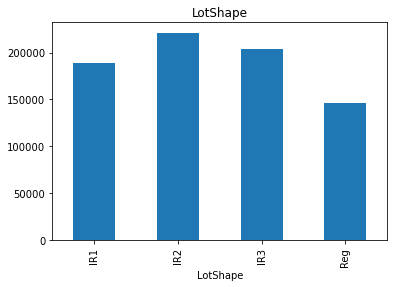

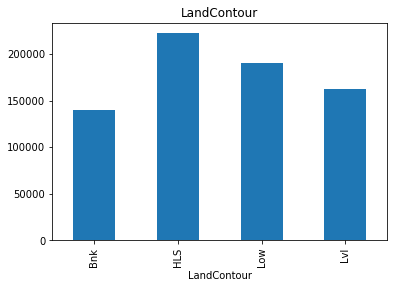

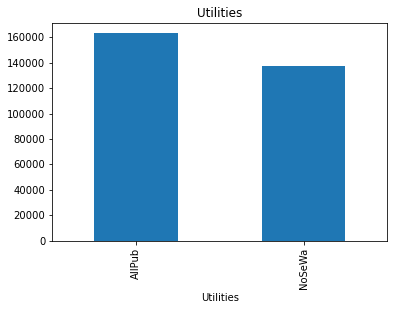

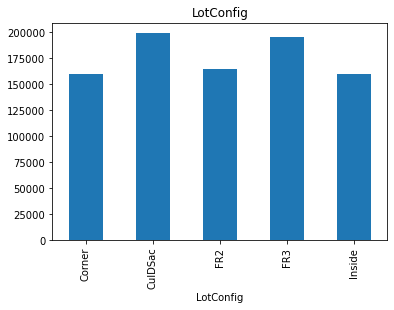

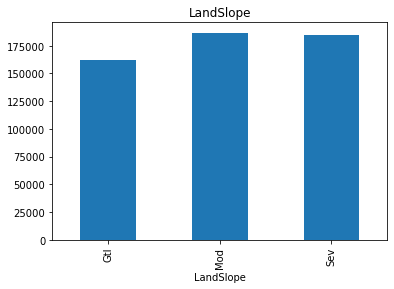

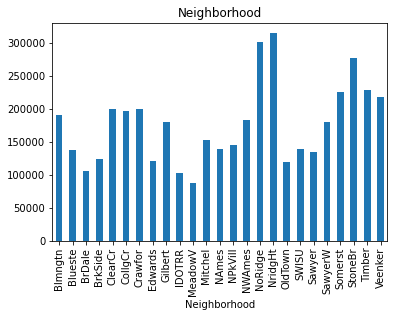

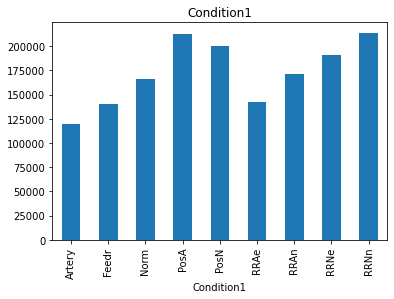

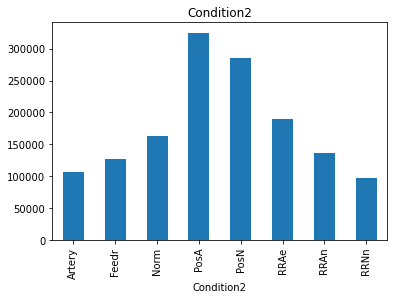

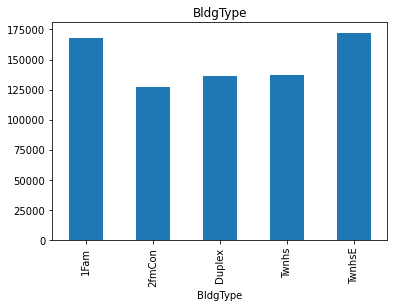

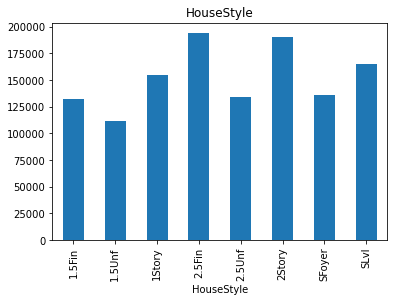

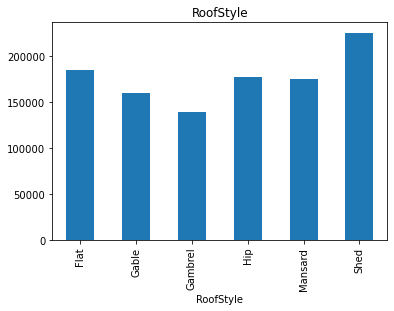

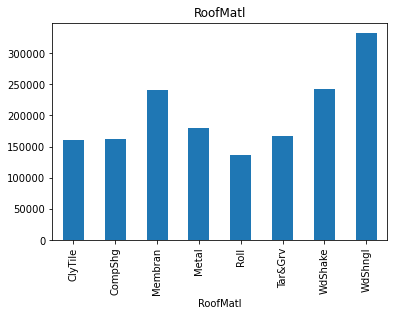

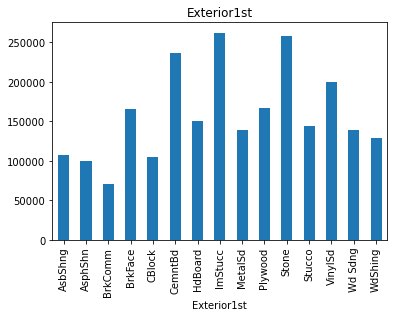

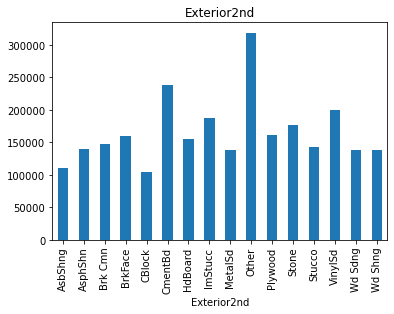

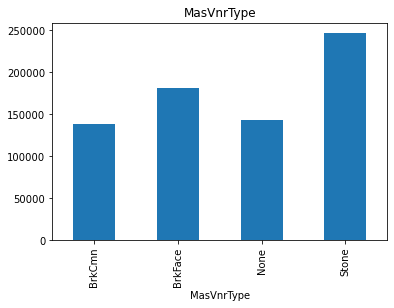

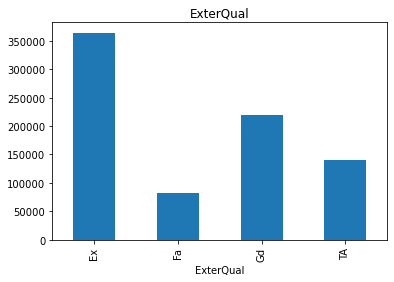

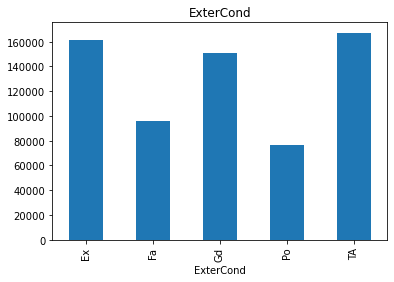

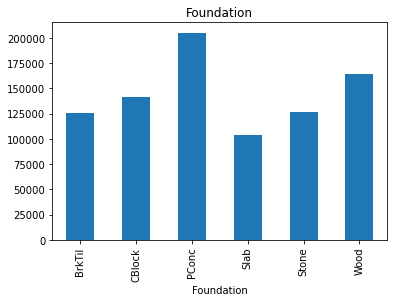

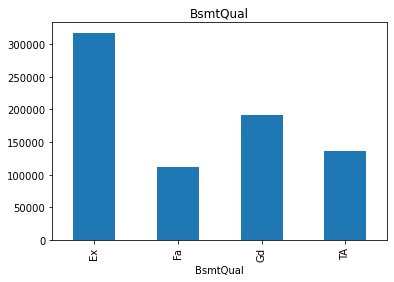

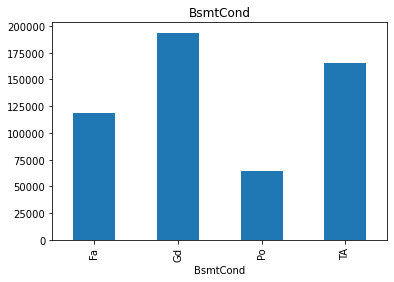

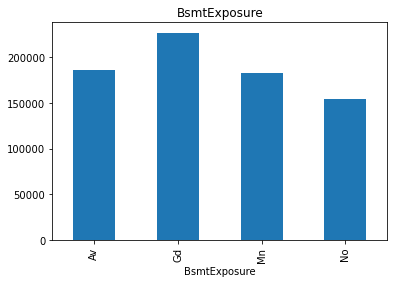

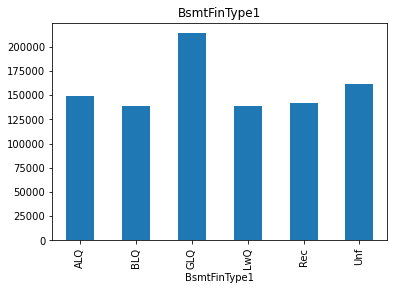

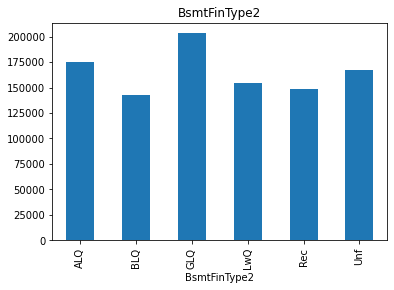

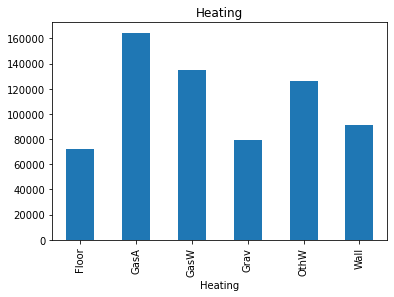

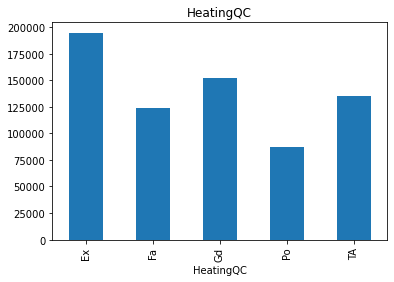

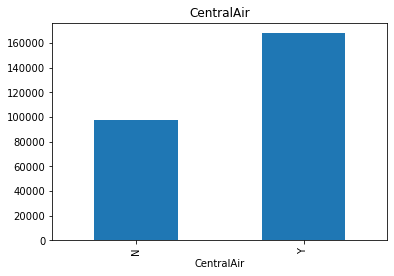

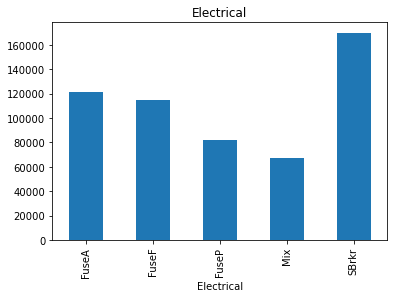

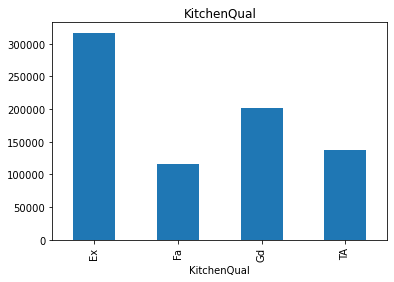

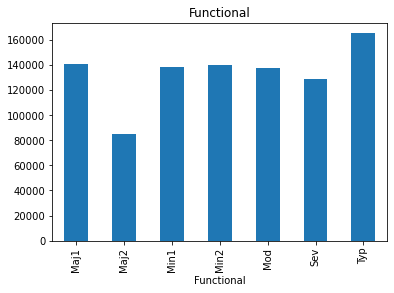

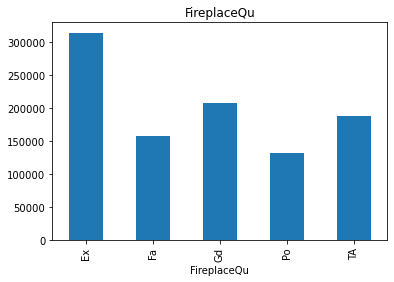

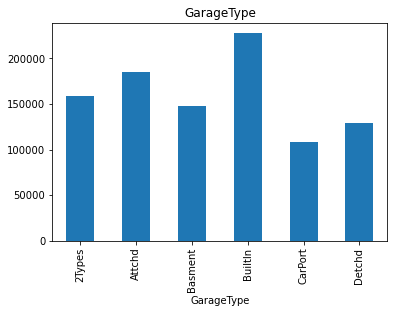

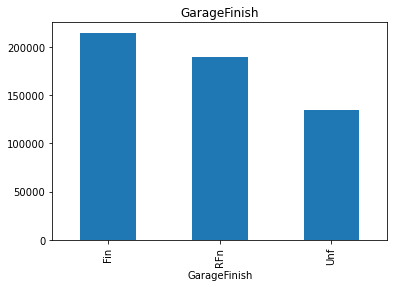

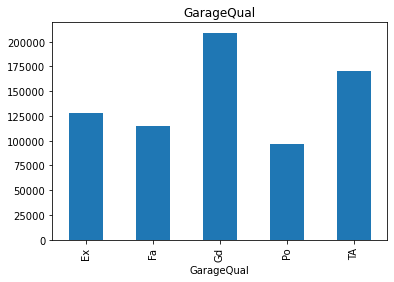

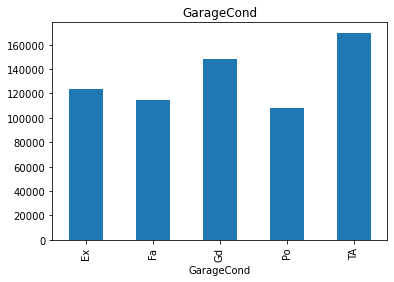

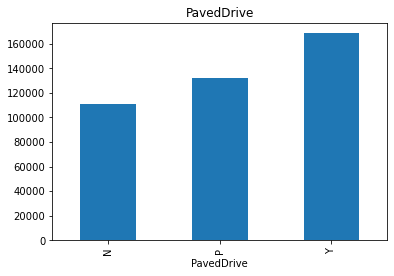

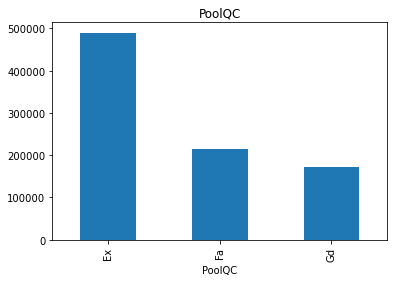

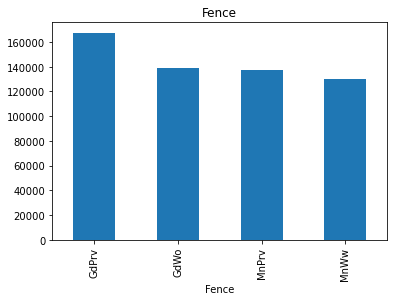

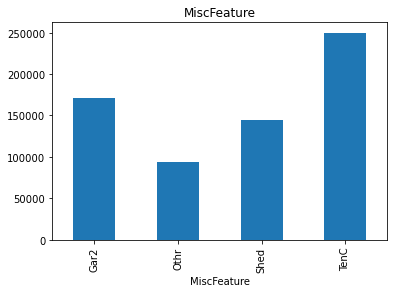

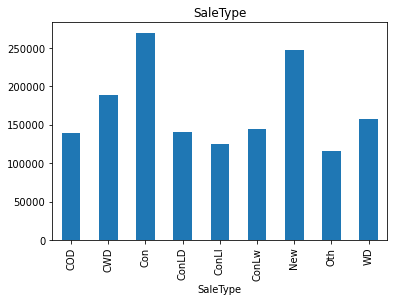

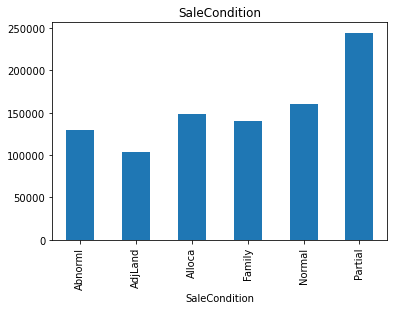

In [26]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
